# EDA List
# Funding Amount (M USD)

# Market Share Distribution by Industry

# Average Revenue by Region

# Pairplot of Core Financial Features

# Funding Rounds

# Distribution of Employees

# Exit Status Analysis Countplot

# Regional Market Share

# Funding Trend Over Time

# Distribution of Numerical Features

# Employees per Startup by Industry (Boxplot)

# Industries with Most Unprofitable Startups

# Funding Amount vs. Valuation

# Success Rate (Exit = Acquired or IPO) by Industry

# Time Trend Analysis (Year Founded)

# Profitable vs Non-Profitable Startups

# Top 10 Most Funded Startups

# Exit Status Analysis Pie chart

# Employees vs. Revenue

# Correlation Heatmap

# Numerical Variables Distribution

# Distribution of Different Industries

# Average Startup Valuation by Region

# Funding Rounds vs Valuation

# Highest startup count by Region

# Employees vs Revenue (Log Scale)

# Percentage of Profitable Startups by Industry

# Yearly Average Funding

# Analysis on Diffrent Industries

# Compare Valuation & Funding Distributions (Overlapped Histogram)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('startup_data.csv')

In [3]:
df.columns

Index(['Startup Name', 'Industry', 'Funding Rounds', 'Funding Amount (M USD)',
       'Valuation (M USD)', 'Revenue (M USD)', 'Employees', 'Market Share (%)',
       'Profitable', 'Year Founded', 'Region', 'Exit Status'],
      dtype='object')

In [4]:
df.head().T

,0,1,2,3,4
Startup Name,Startup_1,Startup_2,Startup_3,Startup_4,Startup_5
Industry,IoT,EdTech,EdTech,Gaming,IoT
Funding Rounds,1,1,1,5,4
Funding Amount (M USD),101.09,247.62,109.24,10.75,249.28
Valuation (M USD),844.75,3310.83,1059.37,101.9,850.11
Revenue (M USD),67.87,75.65,84.21,47.08,50.25
Employees,1468,3280,4933,1059,1905
Market Share (%),5.2,8.1,2.61,2.53,4.09
Profitable,0,1,1,0,0
Year Founded,2006,2003,1995,2003,1997


In [5]:
df.tail().T

,495,496,497,498,499
Startup Name,Startup_496,Startup_497,Startup_498,Startup_499,Startup_500
Industry,EdTech,AI,E-Commerce,Gaming,HealthTech
Funding Rounds,2,2,1,5,4
Funding Amount (M USD),181.86,107.34,160.29,234.65,211.76
Valuation (M USD),2378.65,1394.58,502.09,2814.52,2563.17
Revenue (M USD),59.64,10.22,84.73,53.16,84.19
Employees,3331,2223,2222,4972,2374
Market Share (%),0.58,5.85,4.32,5.53,5.26
Profitable,1,0,0,0,0
Year Founded,1993,2019,2019,2011,2000


In [6]:
# Summary stats for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Funding Rounds,500.0,2.95800,1.440968,1.00,2.0000,3.000,4.0000,5.00
Funding Amount (M USD),500.0,152.65676,86.683711,0.57,79.2125,156.005,226.4500,299.81
Valuation (M USD),500.0,1371.80918,978.226579,2.43,557.0275,1222.580,2052.0850,4357.49
Revenue (M USD),500.0,49.32174,29.267605,0.12,22.8025,48.800,74.9650,99.71
Employees,500.0,2532.09200,1385.434921,12.00,1382.7500,2496.500,3708.7500,4984.00
Market Share (%),500.0,5.09294,2.807646,0.10,2.7600,5.135,7.5525,10.00
Profitable,500.0,0.43200,0.495851,0.00,0.0000,0.000,1.0000,1.00
Year Founded,500.0,2006.04400,9.347128,1990.00,1998.0000,2006.000,2014.0000,2022.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Startup Name            500 non-null    object 
 1   Industry                500 non-null    object 
 2   Funding Rounds          500 non-null    int64  
 3   Funding Amount (M USD)  500 non-null    float64
 4   Valuation (M USD)       500 non-null    float64
 5   Revenue (M USD)         500 non-null    float64
 6   Employees               500 non-null    int64  
 7   Market Share (%)        500 non-null    float64
 8   Profitable              500 non-null    int64  
 9   Year Founded            500 non-null    int64  
 10  Region                  500 non-null    object 
 11  Exit Status             500 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 47.0+ KB


In [8]:
# Counts missing values per column
df.isnull().sum()

Startup Name              0
Industry                  0
Funding Rounds            0
Funding Amount (M USD)    0
Valuation (M USD)         0
Revenue (M USD)           0
Employees                 0
Market Share (%)          0
Profitable                0
Year Founded              0
Region                    0
Exit Status               0
dtype: int64

In [9]:
# Checks for duplicate rows
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(500, 12)

In [11]:
df.corr

<bound method DataFrame.corr of     Startup Name    Industry  Funding Rounds  Funding Amount (M USD)  \
0      Startup_1         IoT               1                  101.09   
1      Startup_2      EdTech               1                  247.62   
2      Startup_3      EdTech               1                  109.24   
3      Startup_4      Gaming               5                   10.75   
4      Startup_5         IoT               4                  249.28   
..           ...         ...             ...                     ...   
495  Startup_496      EdTech               2                  181.86   
496  Startup_497          AI               2                  107.34   
497  Startup_498  E-Commerce               1                  160.29   
498  Startup_499      Gaming               5                  234.65   
499  Startup_500  HealthTech               4                  211.76   

     Valuation (M USD)  Revenue (M USD)  Employees  Market Share (%)  \
0               844.75         

In [48]:
# Remove unwanted column
df.drop(columns=['Startup Name'],inplace=True)

In [51]:
corr = df.corr(numeric_only=True)

### Value Counts for Categorical Columns

In [14]:
df['Industry'].value_counts()

Industry
EdTech           74
FinTech          71
E-Commerce       70
Gaming           62
AI               62
IoT              61
Cybersecurity    51
HealthTech       49
Name: count, dtype: int64

In [15]:
df['Region'].value_counts()

Region
Australia        108
Asia             103
Europe           102
North America     97
South America     90
Name: count, dtype: int64

In [16]:
# Find the unique values in each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Startup Name: 500
Industry: 8
Funding Rounds: 5
Funding Amount (M USD): 494
Valuation (M USD): 500
Revenue (M USD): 490
Employees: 478
Market Share (%): 384
Profitable: 2
Year Founded: 33
Region: 5
Exit Status: 3


## 1. Funding Amount (M USD)

<Axes: xlabel='Funding Amount (M USD)', ylabel='Count'>

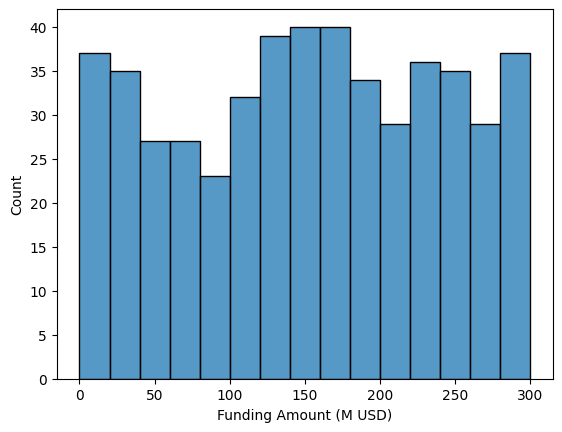

In [17]:
sns.histplot(data=df,x='Funding Amount (M USD)',bins=[0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300])

## 2. Market Share Distribution by Industry

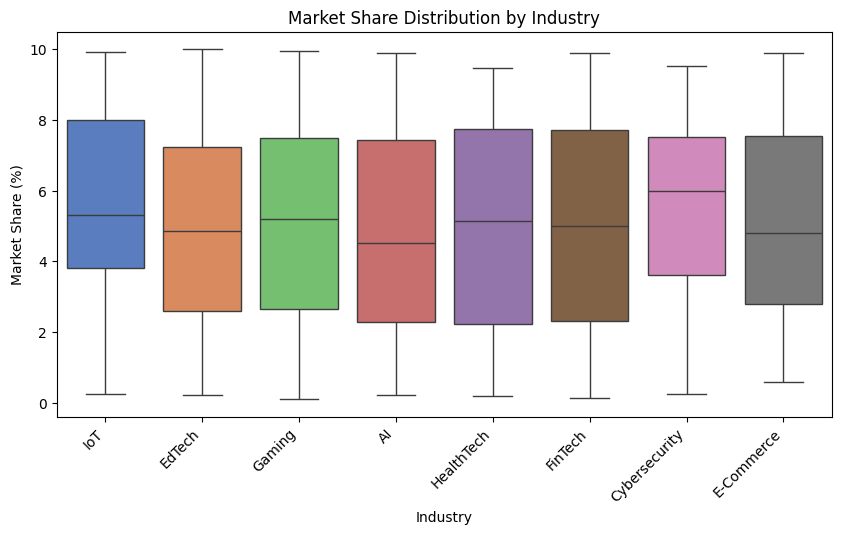

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Industry'], y=df['Market Share (%)'], palette='muted')
plt.xticks(rotation=45, ha='right')
plt.title('Market Share Distribution by Industry')
plt.xlabel('Industry')
plt.ylabel('Market Share (%)')
plt.show()

## 3. Average Revenue by Region

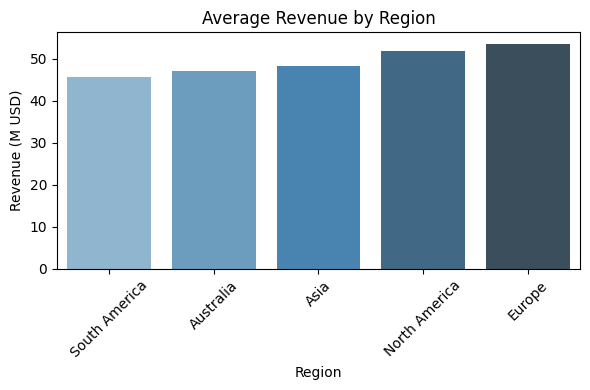

In [22]:
avg_revenue = df.groupby('Region')['Revenue (M USD)'].mean().sort_values()
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_revenue.index, y=avg_revenue.values, palette='Blues_d')
plt.title('Average Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue (M USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Pairplot of Core Financial Features

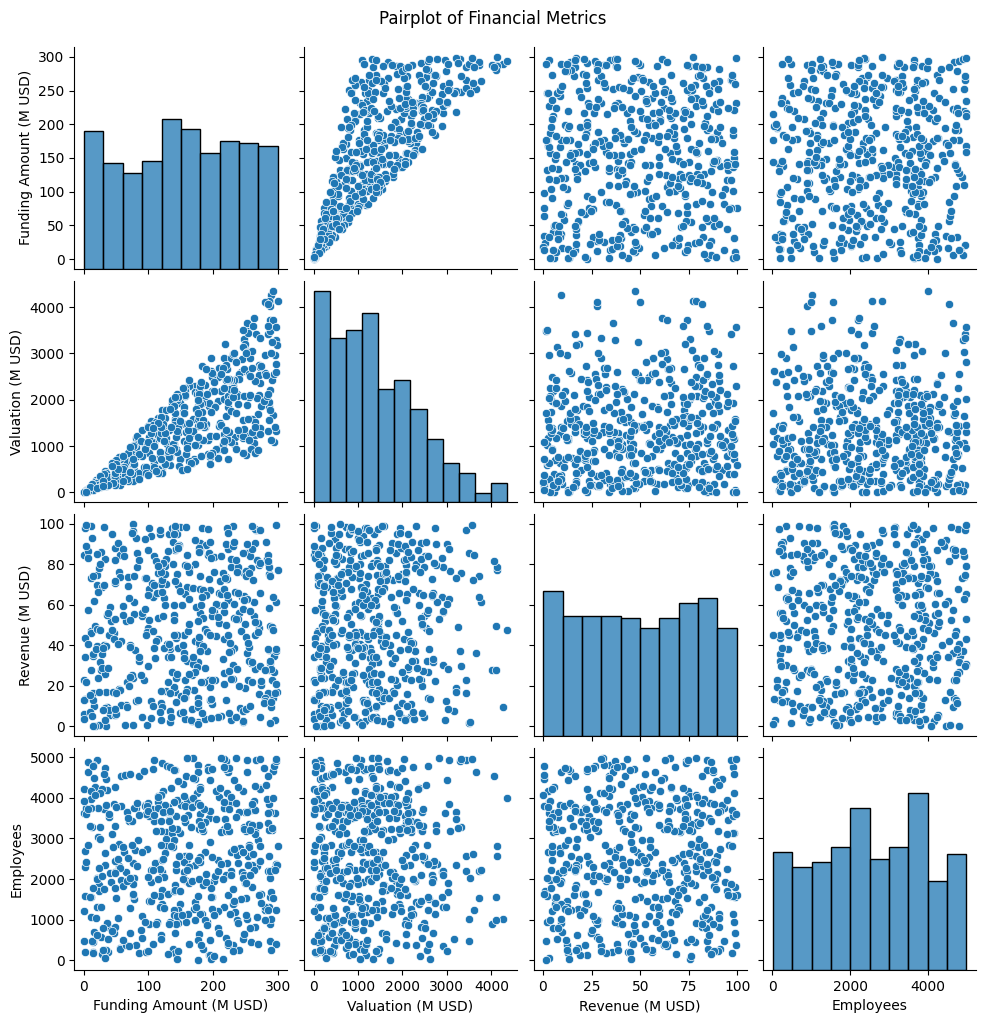

In [23]:
core_features = ['Funding Amount (M USD)', 'Valuation (M USD)', 'Revenue (M USD)', 'Employees']
sns.pairplot(df[core_features])
plt.suptitle('Pairplot of Financial Metrics', y=1.02)
plt.show()

## 5. Funding Rounds

<Axes: xlabel='Funding Rounds', ylabel='Count'>

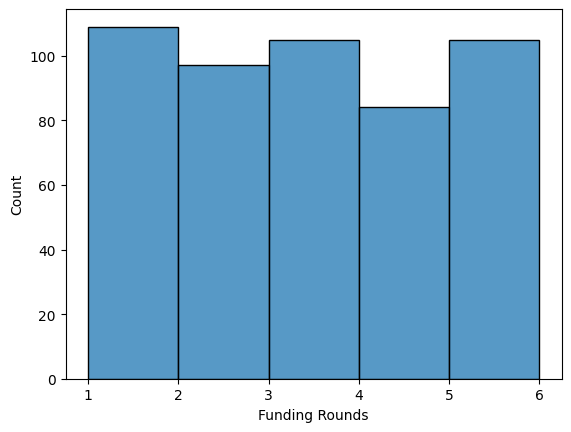

In [25]:
sns.histplot(data=df,x='Funding Rounds',bins=[1,2,3,4,5,6])

## 6. Distribution of Employees

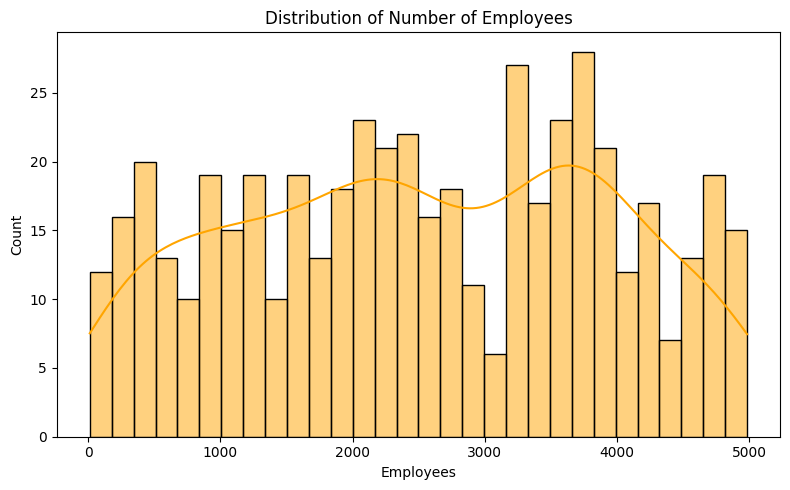

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Employees'], bins=30, kde=True, color='orange')
plt.title('Distribution of Number of Employees')
plt.xlabel('Employees')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 7. Exit Status Analysis Countplot

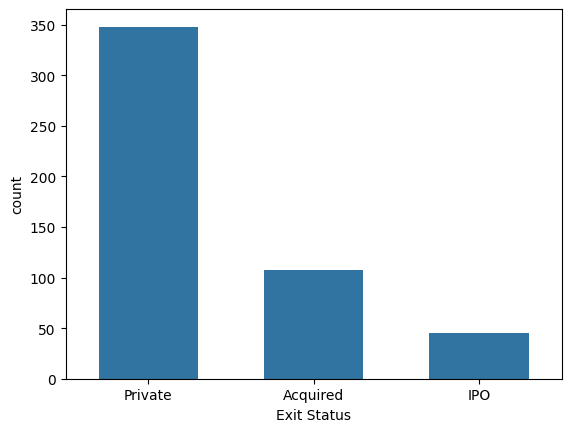

In [27]:
sns.countplot(data=df,x=df['Exit Status'],width=0.6)
plt.show()

## 8. Regional Market Share

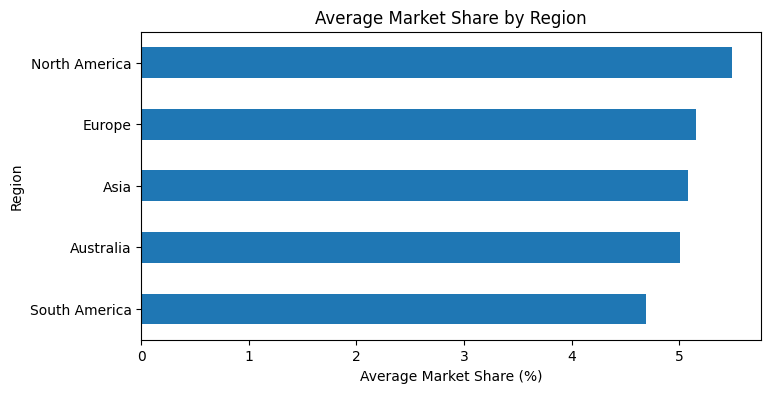

In [28]:
plt.figure(figsize=(8, 4))
df.groupby('Region')['Market Share (%)'].mean().sort_values().plot(kind='barh')
plt.title('Average Market Share by Region')
plt.xlabel('Average Market Share (%)')
plt.show()

## 9. Funding Trend Over Time

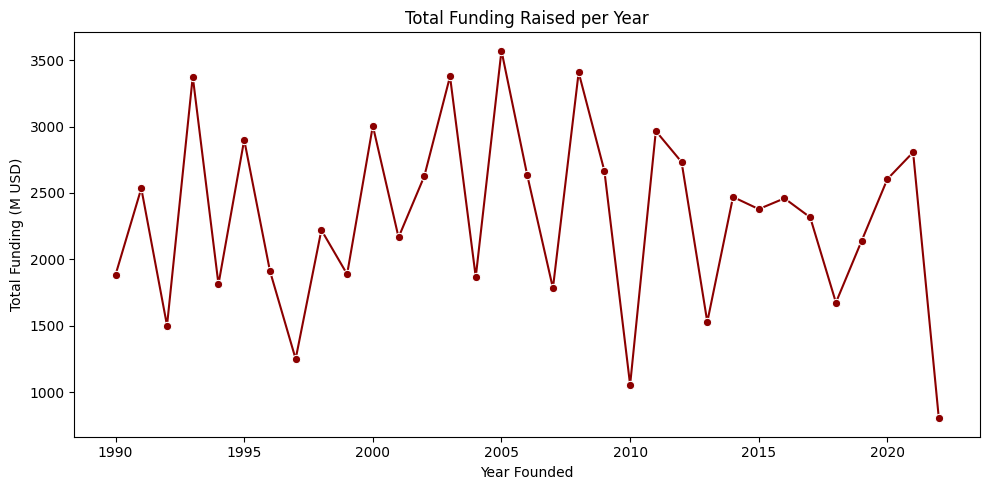

In [29]:
funding_trend = df.groupby('Year Founded')['Funding Amount (M USD)'].sum().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=funding_trend.index, y=funding_trend.values, marker='o', color='darkred')
plt.title('Total Funding Raised per Year')
plt.xlabel('Year Founded')
plt.ylabel('Total Funding (M USD)')
plt.tight_layout()
plt.show()

## 10. Distribution of Numerical Features

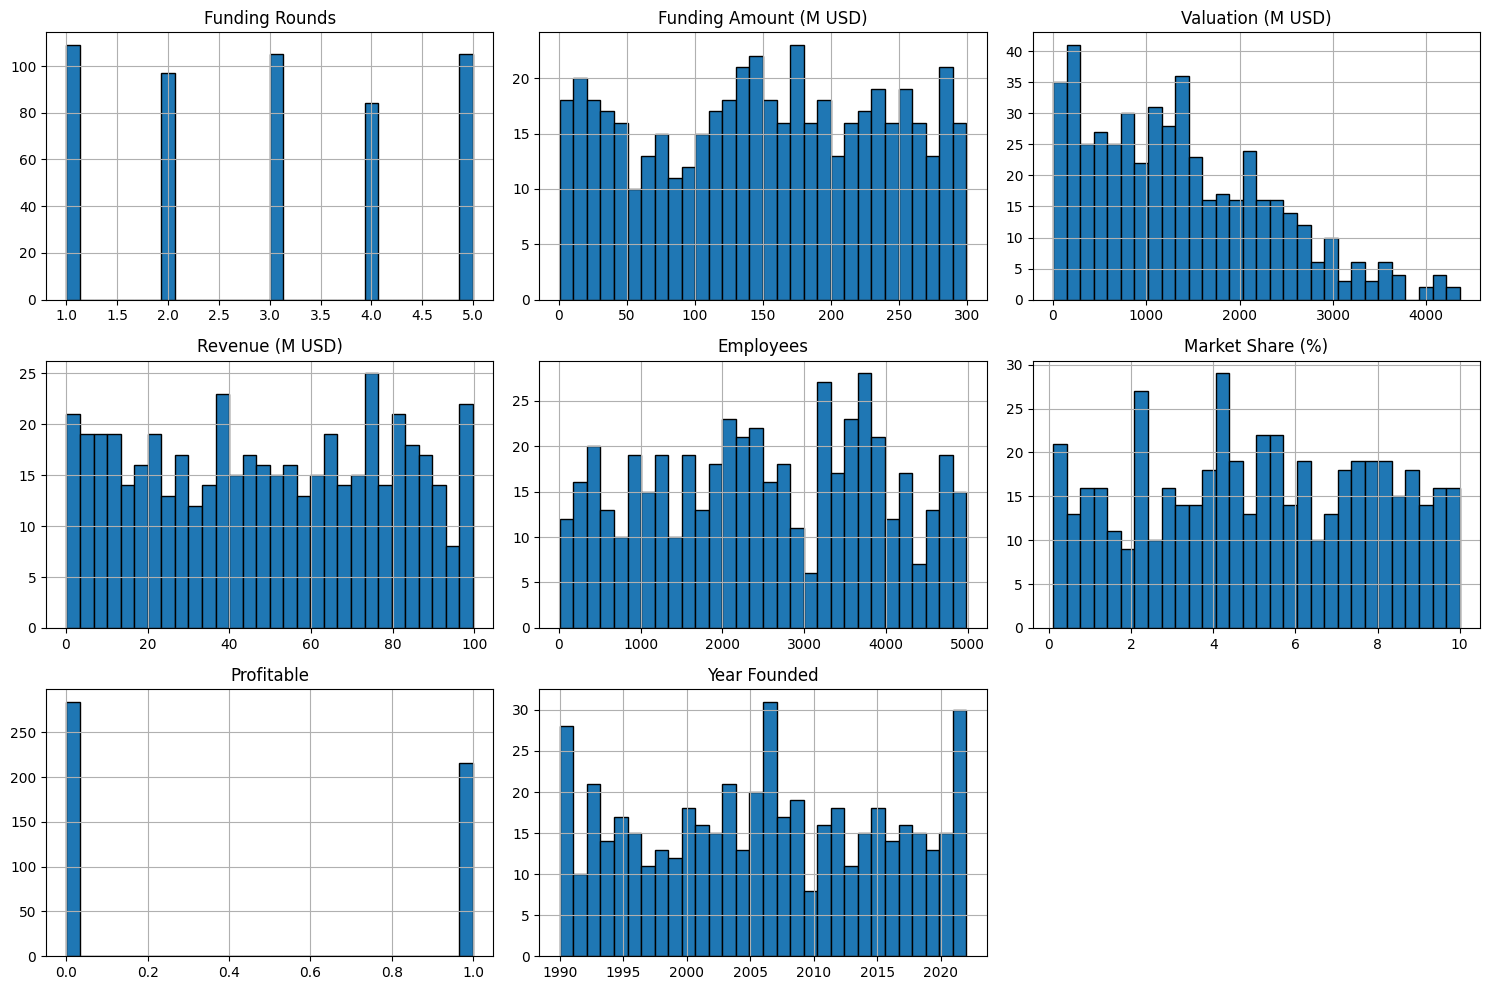

In [30]:
df.select_dtypes(include='number').hist(bins=30, figsize=(15, 10), edgecolor='black')

plt.tight_layout()
plt.show()

## 11. Employees per Startup by Industry

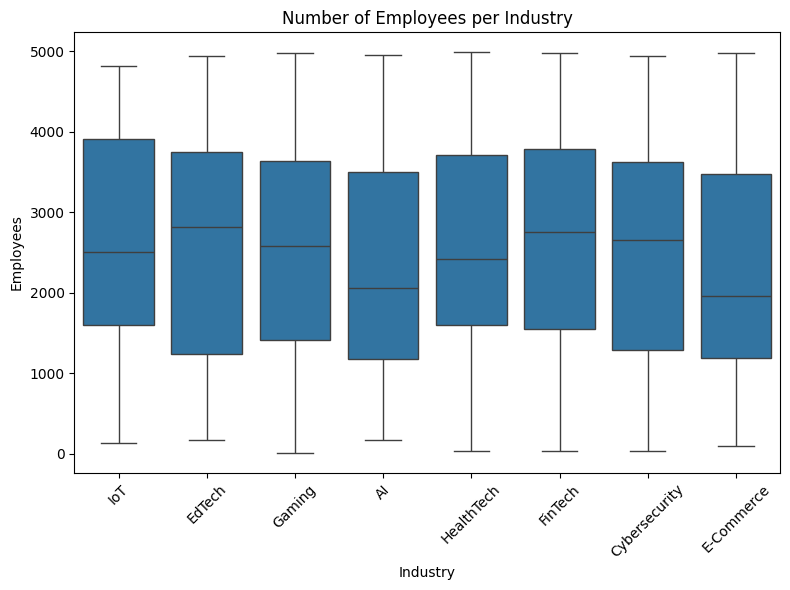

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Industry', y='Employees')
plt.title('Number of Employees per Industry')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 12. Industries with Most Unprofitable Startups

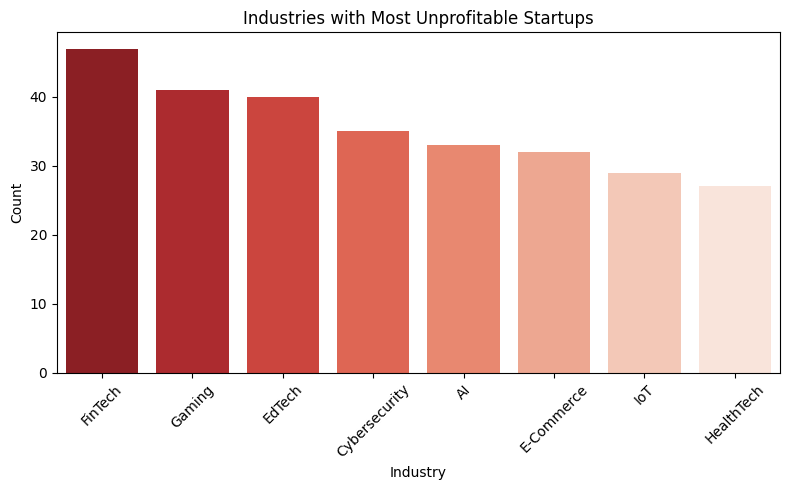

In [34]:
unprofitable_counts = df[df['Profitable'] == 0]['Industry'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=unprofitable_counts.index, y=unprofitable_counts.values, palette='Reds_r')
plt.title('Industries with Most Unprofitable Startups')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 13. Funding Amount vs. Valuation

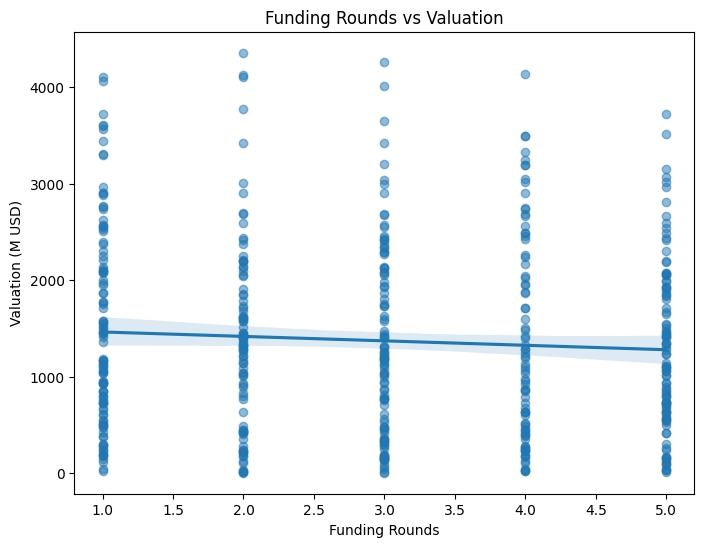

In [35]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Funding Rounds', y='Valuation (M USD)', data=df, scatter_kws={'alpha':0.5})
plt.title('Funding Rounds vs Valuation')
plt.show()

## 14. Success Rate (Exit = Acquired or IPO) by Industry

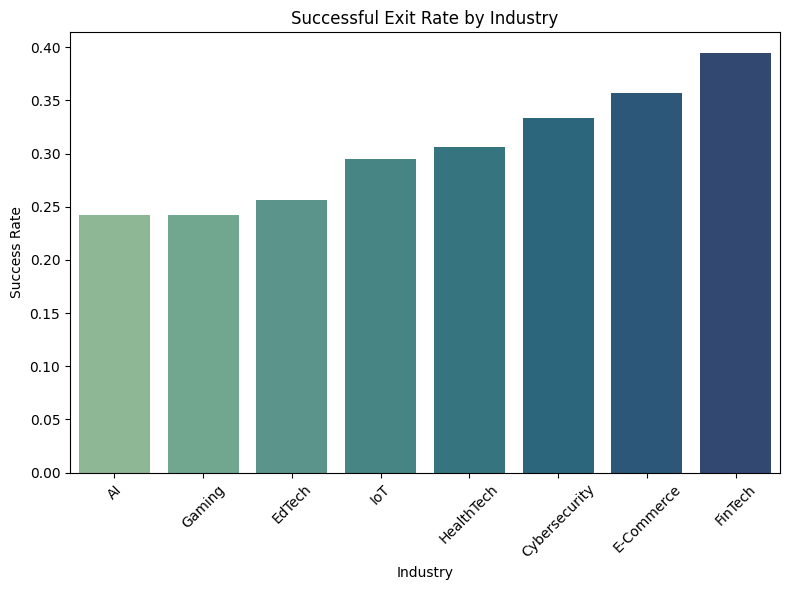

In [37]:
df['Successful Exit'] = df['Exit Status'].isin(['Acquired', 'IPO']).astype(int)
success_rate = df.groupby('Industry')['Successful Exit'].mean().sort_values()
plt.figure(figsize=(8, 6))
sns.barplot(x=success_rate.index, y=success_rate.values, palette='crest')
plt.title('Successful Exit Rate by Industry')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 15. Time Trend Analysis (Year Founded)

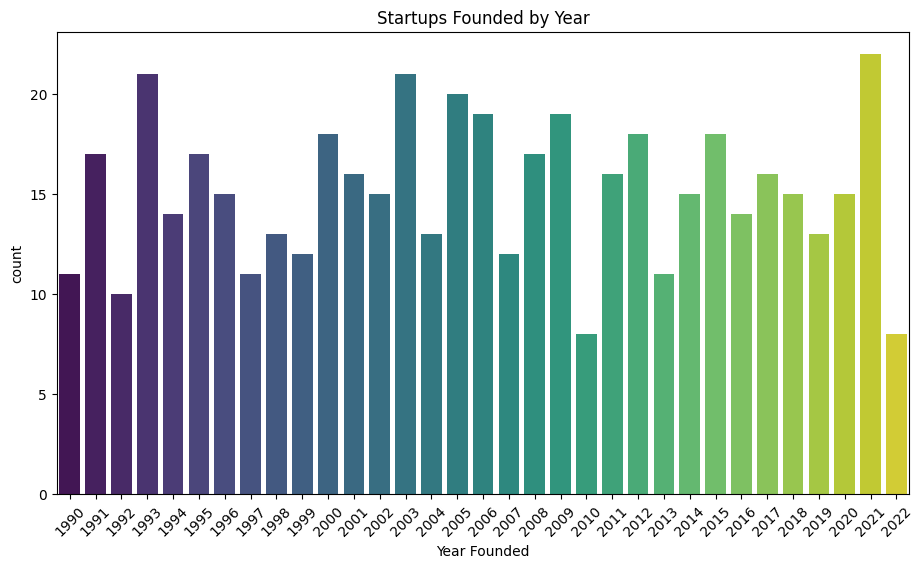

In [38]:
plt.figure(figsize=(11, 6))
sns.countplot(x='Year Founded', data=df, palette='viridis')
plt.title('Startups Founded by Year')
plt.xticks(rotation=45)
plt.show()

## 16. plt.figure(figsize=(8, 6))

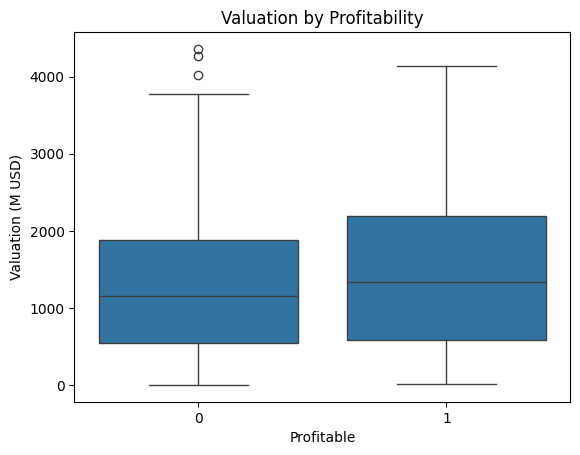

In [41]:
sns.boxplot(x='Profitable', y='Valuation (M USD)', data=df)
plt.title('Valuation by Profitability')
plt.show()

## 17. Top 10 Most Funded Startups

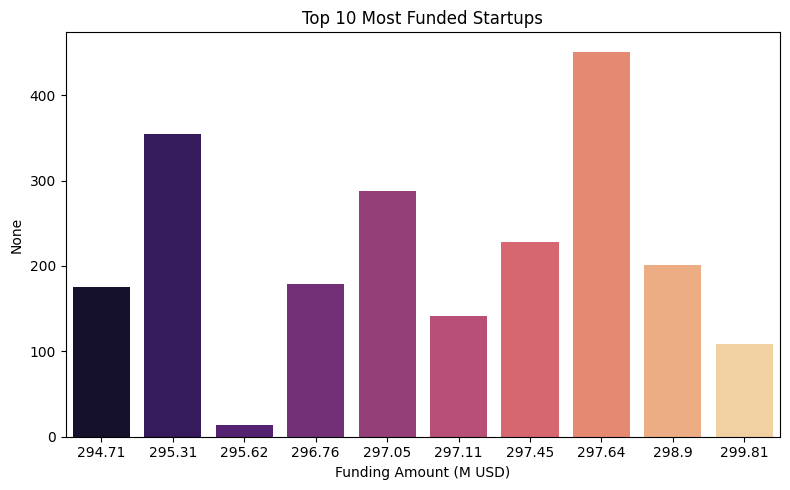

In [42]:
top_funded = df.sort_values(by='Funding Amount (M USD)', ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(data=top_funded, x='Funding Amount (M USD)', y=top_funded.index, palette='magma')
plt.title('Top 10 Most Funded Startups')
plt.xlabel('Funding Amount (M USD)')
plt.tight_layout()
plt.show()

## 18. Exit Status Analysis Pie chart

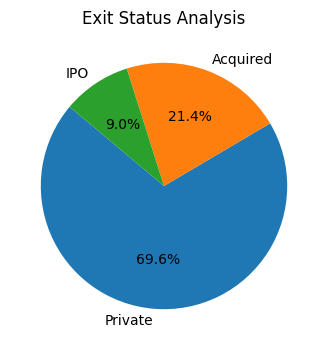

In [43]:
plt.figure(figsize=(6, 4)) 
plt.pie(df['Exit Status'].value_counts().values, labels=df['Exit Status'].value_counts().index, autopct='%1.1f%%', startangle=140)

plt.title("Exit Status Analysis")

plt.show()

## 19. Employees vs. Revenue 

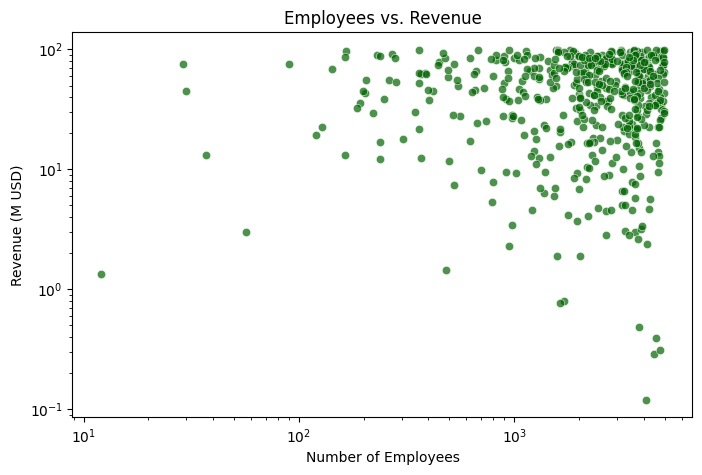

In [44]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Employees'], y=df['Revenue (M USD)'], alpha=0.7, color='darkgreen')
plt.title('Employees vs. Revenue')
plt.xlabel('Number of Employees')
plt.ylabel('Revenue (M USD)')
plt.xscale('log')
plt.yscale('log')
plt.show()

## 20. Correlation Heatmap

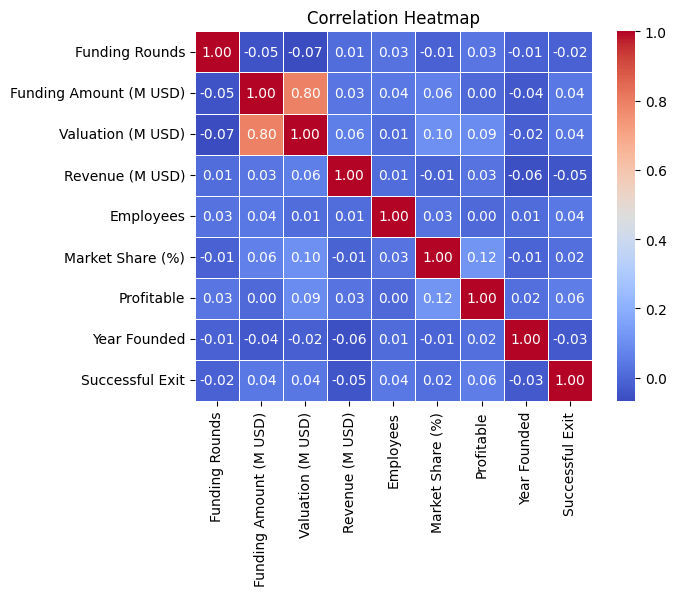

In [52]:
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 21. Numerical Variables Distribution

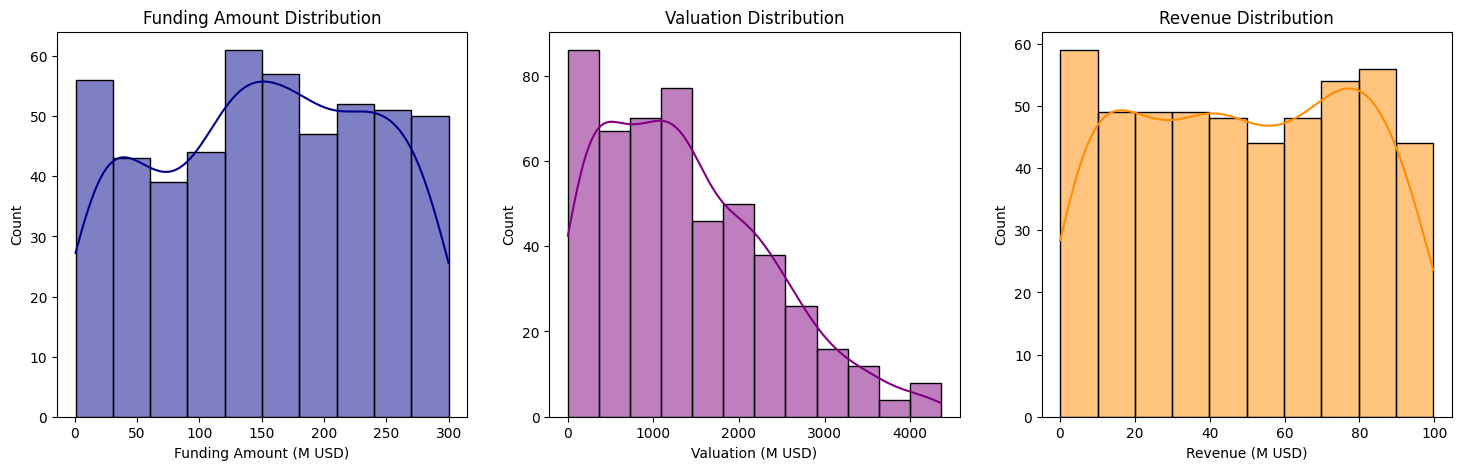

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Funding Amount (M USD)'], ax=axes[0], kde=True, color='darkblue')
axes[0].set_title('Funding Amount Distribution')

sns.histplot(df['Valuation (M USD)'], ax=axes[1], kde=True, color='purple')
axes[1].set_title('Valuation Distribution')

sns.histplot(df['Revenue (M USD)'], ax=axes[2], kde=True, color='darkorange')
axes[2].set_title('Revenue Distribution')
plt.show()

## 22. Distribution of Different Industries

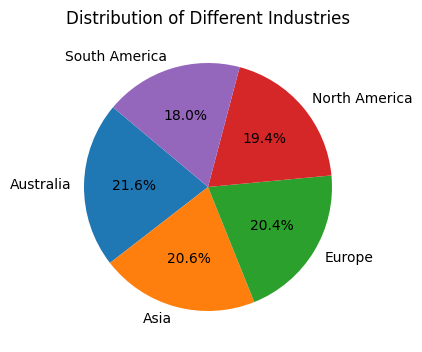

In [56]:
industry_counts = df['Industry'].value_counts()

plt.figure(figsize=(4, 6))
plt.pie(df['Region'].value_counts().values, labels=df['Region'].value_counts().index, autopct='%1.1f%%', startangle=140)

plt.title("Distribution of Different Industries")

plt.show()

## 23. Average Startup Valuation by Region

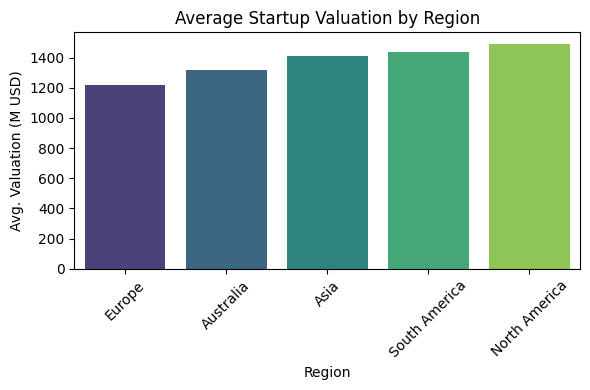

In [61]:
plt.figure(figsize=(6, 4))
region_valuation = df.groupby('Region')['Valuation (M USD)'].mean().sort_values()
sns.barplot(x=region_valuation.index, y=region_valuation.values, palette='viridis')
plt.title('Average Startup Valuation by Region')
plt.xlabel('Region')
plt.ylabel('Avg. Valuation (M USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 24. Funding Rounds vs Valuation 

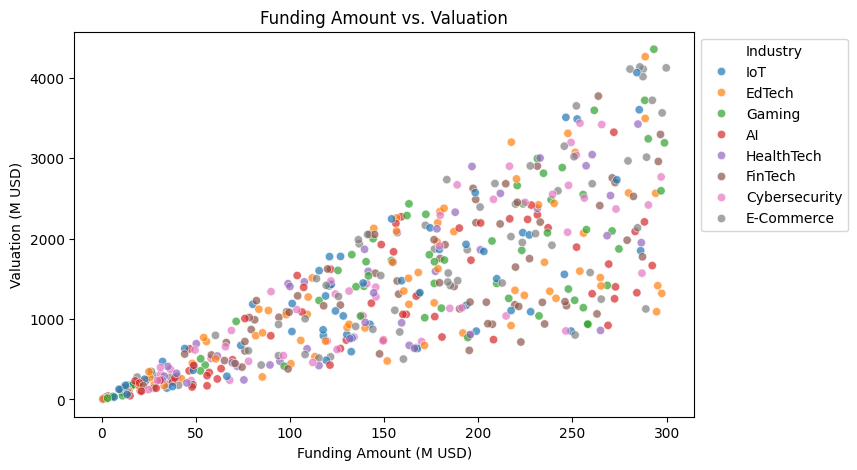

In [62]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Funding Amount (M USD)'], y=df['Valuation (M USD)'], hue=df['Industry'], alpha=0.7)
plt.title('Funding Amount vs. Valuation')
plt.xlabel('Funding Amount (M USD)')
plt.ylabel('Valuation (M USD)')
plt.legend(title='Industry', bbox_to_anchor=(1, 1))
plt.show()

## 25. Highest startup count by Region

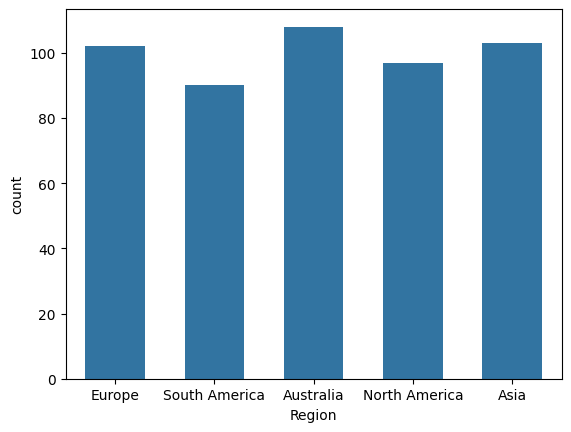

In [63]:
sns.countplot(data=df,x=df['Region'],width=0.6)
plt.show()

## 26. Employees vs Revenue (Log Scale)

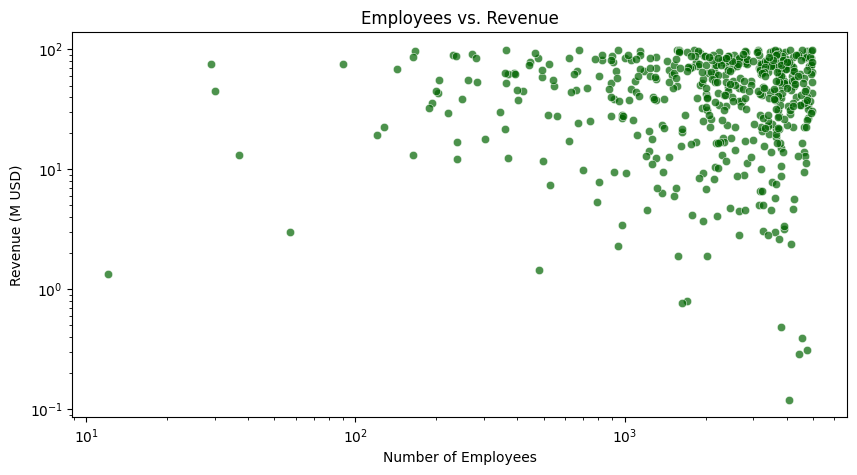

In [66]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Employees'], y=df['Revenue (M USD)'], alpha=0.7, color='darkgreen')
plt.title('Employees vs. Revenue')
plt.xlabel('Number of Employees')
plt.ylabel('Revenue (M USD)')
plt.xscale('log') 
plt.yscale('log')
plt.show()

## 27. Percentage of Profitable Startups by Industry

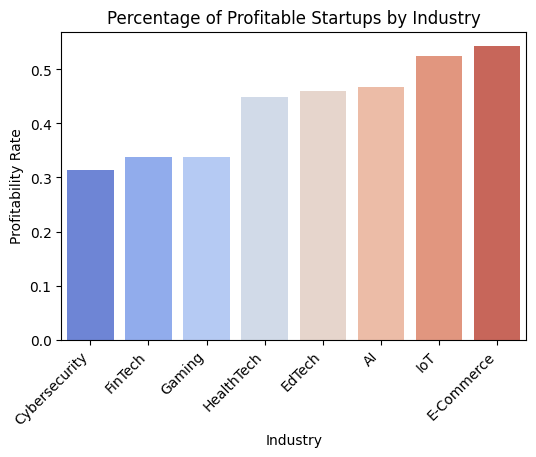

In [70]:
plt.figure(figsize=(6, 4))
profit_counts = df.groupby('Industry')['Profitable'].mean().sort_values()
sns.barplot(x=profit_counts.index, y=profit_counts.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of Profitable Startups by Industry')
plt.xlabel('Industry')
plt.ylabel('Profitability Rate')
plt.show()

## 28. Yearly Average Funding

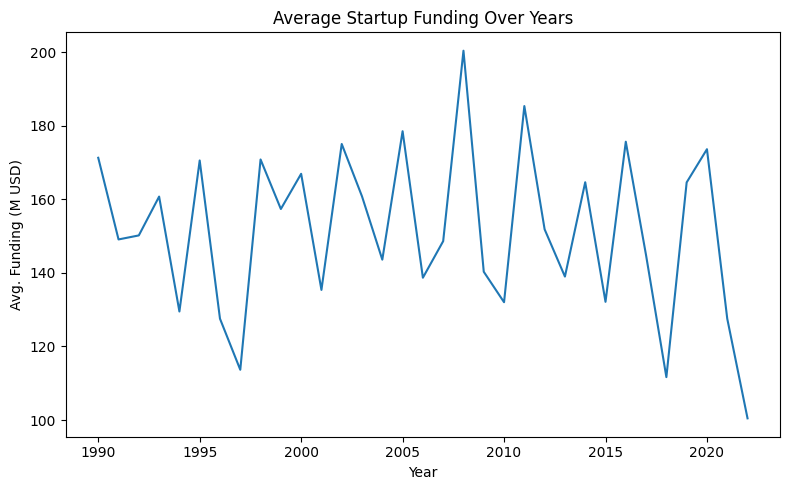

In [72]:
yearly_funding_avg = df.groupby('Year Founded')['Funding Amount (M USD)'].mean()
plt.figure(figsize=(8, 5))
sns.lineplot(x=yearly_funding_avg.index, y=yearly_funding_avg.values)
plt.title('Average Startup Funding Over Years')
plt.xlabel('Year')
plt.ylabel('Avg. Funding (M USD)')
plt.tight_layout()
plt.show()

## 29. Analysis on Diffrent Industries

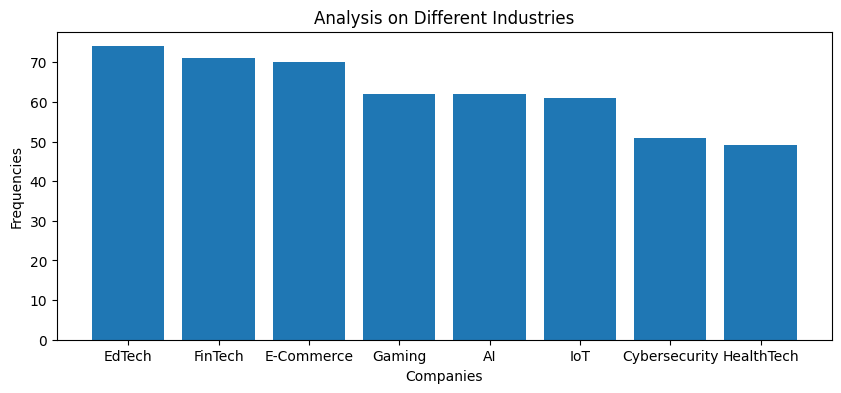

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))  
plt.bar(x=df['Industry'].value_counts().index,height=df['Industry'].value_counts().values)
plt.title("Analysis on Different Industries")
plt.xlabel("Companies")
plt.ylabel("Frequencies")
plt.show()

## 30. Compare Valuation & Funding Distributions (Overlapped Histogram)

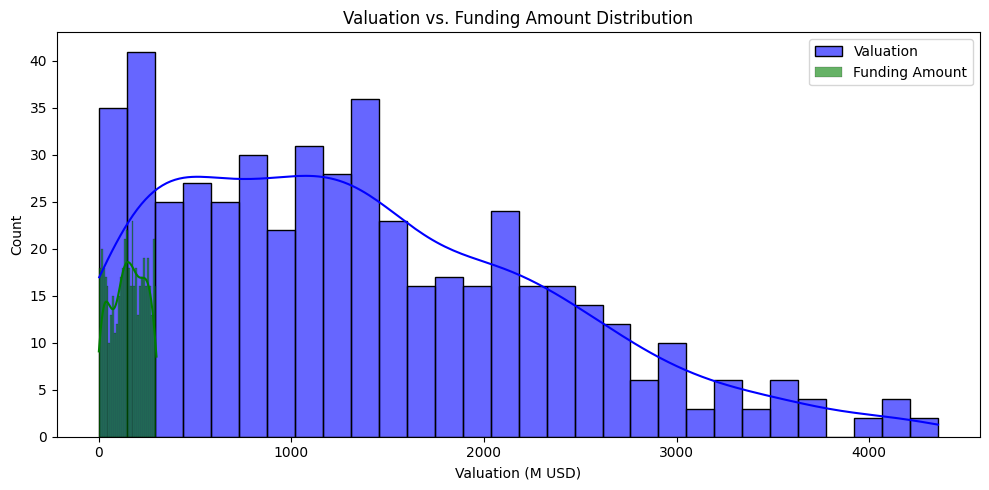

In [75]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Valuation (M USD)'], color='blue', label='Valuation', kde=True, bins=30, alpha=0.6)
sns.histplot(df['Funding Amount (M USD)'], color='green', label='Funding Amount', kde=True, bins=30, alpha=0.6)
plt.legend()
plt.title('Valuation vs. Funding Amount Distribution')
plt.tight_layout()
plt.show()

# THANK YOU